In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

**1- Load and Shuffle Data**

In [95]:
banknote_df = pd.read_csv('data_banknote_authentication.csv')

In [96]:
banknote_df

,variance,skewness,-2.8073,-0.44699,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [97]:
banknote_df.shape

(1371, 5)

In [98]:
banknote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   -2.8073   1371 non-null   float64
 3   -0.44699  1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [99]:
banknote_df.describe()

,variance,skewness,-2.8073,-0.44699,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [100]:
# shuffle the DataFrame rows
banknote_df.sample(frac = 1)

,variance,skewness,-2.8073,-0.44699,class
84,4.02960,2.6756,0.806850,0.716790,0
35,2.68810,6.0195,-0.466410,-0.692680,0
160,3.54990,8.6165,-3.279400,-1.200900,0
1335,-2.05450,-10.8679,9.492600,-1.411600,1
712,4.09620,10.1891,-3.932300,-4.182700,0
...,...,...,...,...,...
1136,-1.58770,-6.6072,5.802200,0.315930,1
371,0.74307,11.1700,-1.382400,-4.072800,0
339,4.99230,7.8653,-2.351500,-0.719840,0
1033,0.67886,4.1199,-4.569000,-4.141400,1


**2- Rename Columns of our Data Frame**

In [101]:
banknote_df.rename(columns=({'3.6216' : 'variance' , '8.6661' : 'skewness'}))

,variance,skewness,-2.8073,-0.44699,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


**3- Select Features and Labels**

In [102]:
#variance and skewness are features.
features = banknote_df.drop(['-2.8073' , '-0.44699' , 'class'] , axis = 1).values
#class is the label.
label = banknote_df["class"]

In [103]:
features.shape

(1371, 2)

In [104]:
label.shape

(1371,)

**4- Standradize Data**

In [105]:
#Standradize 
features = (features - np.mean(features , axis = 0)) / np.std(features , axis = 0 , ddof = 1)

In [106]:
features

array([[ 1.4474927 ,  1.06502792],
       [ 1.20830138, -0.77632172],
       [ 1.06427296,  1.2959954 ],
       ...,
       [-1.47114098, -2.62015929],
       [-1.40549441, -1.75519851],
       [-1.04602141, -0.43887473]])

 **The Scatter plot for Data Standradizatin**

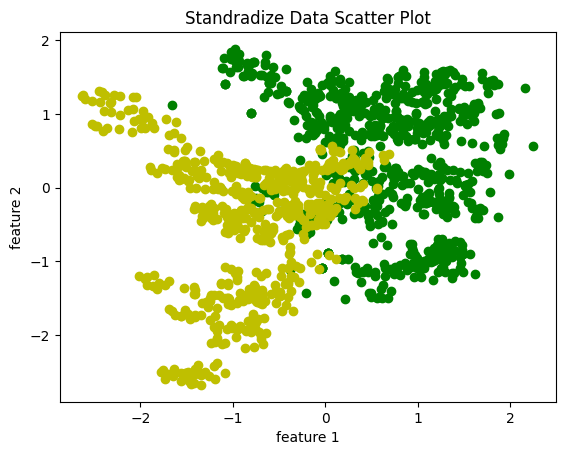

In [107]:
plt.scatter(features[ : , 0][label == 0 ] , features[ : , 1][label == 0] , c = 'g')
plt.scatter(features[ : , 0][label == 1 ] , features[ : , 1][label == 1] , c = 'y')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Standradize Data Scatter Plot")
plt.show()

**Perceptron Implementation**

In [108]:
#intialize learning rate and number of iterations
alpha = 0.0001
num_iterations = 1000

In [109]:
def perceptron(x, y, alpha, num_iterations):
    # initialize the bias parameter and the weights
    y_pred = []
    b = 0
    num_samples, num_features = x.shape
    w = np.zeros((num_features,))
    z = np.zeros((num_samples,))
    for i in range(num_iterations):
        n_error = 0 
        for j in range(num_samples):
            z[j] = np.dot(w, x[j]) + b
            if z[j] > 0:
                yhat = 1
            else:
                yhat = 0
            #count number of errors
            if yhat != y[j]:
                n_error += 1
            w -= alpha * (yhat - y[j]) * x[j]
            b -= alpha * (yhat - y[j])
            y_pred.append(yhat)
    accuracy = 100 * (n_error / x.shape[0])
    return w, b , accuracy

In [110]:
perceptron_test = perceptron(features , label , alpha , num_iterations)

In [111]:
perceptron_test

(array([-1.73691109e-04, -7.23374086e-05]),
 0.00019999999999999998,
 0.7293946024799417)

**Split Data**

In [112]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)
# Train the perceptron model on the training set
alpha = 0.01
num_iterations = 1000
w, b , accuracy = perceptron(x_train, y_train, alpha, num_iterations)

# Make predictions on the test set
y_pred = []
for j in range(len(x_test)):
    z = np.dot(w, x_test[j]) + b
    if z > 0:
        yhat = 1
    else:
        yhat = 0
    y_pred.append(yhat)
# Construct the confusion matrix
#Confusion matrix is used to tell us how many correct classifiers and how many wrong.
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[138  10]
 [ 39  88]]


In [113]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8218181818181818


**Boundry Line for Perceptron**

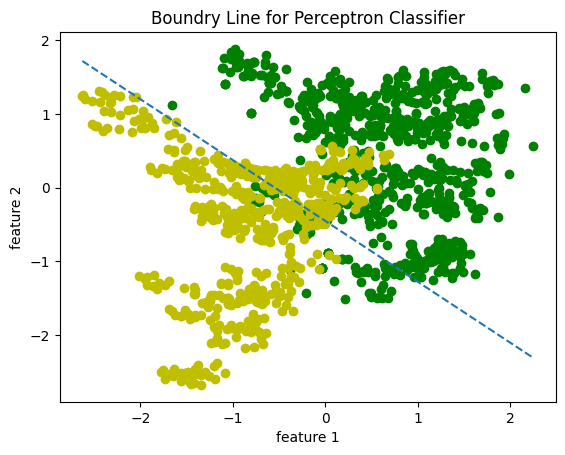

In [114]:
# Define the slope and intercept of the decision boundary line
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create a scatter plot of the data
plt.scatter(features[ : , 0][label == 0 ] , features[ : , 1][label == 0] , c = 'g')
plt.scatter(features[ : , 0][label == 1 ] , features[ : , 1][label == 1] , c = 'y')

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Boundry Line for Perceptron Classifier")

# Plot the decision boundary line
x_vals = np.array([features[:, 0].min(), features[:, 0].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, '--')
plt.show()